# **Applying Convolutional Neural Networks for Detection of Pneumonia from X-Ray Images**

# **Problem Statement**

Pneumonia remains one of the leading causes of morbidity and mortality in children worldwide, especially in low‑ and middle‑income countries where rapid diagnostic tools are limited. Manual interpretation of chest X‑rays can be time‑consuming and subject to inter‑observer variability. The goal of this project is to develop and evaluate a machine‑learning–based system that can accurately distinguish between pediatric pneumonia and normal chest X‑rays, thereby providing a fast, consistent, and scalable decision support tool for radiologists and clinicians.

## **Context**

Early and accurate diagnosis of pneumonia in young children (ages 1–5) is critical for timely treatment and improved clinical outcomes. While chest radiography is the standard imaging modality for detecting lung infections, radiologist workloads and variability in expertise can lead to delays or misdiagnoses. Recent advances in deep learning, particularly convolutional neural networks (CNNs), have shown promise for automated medical image analysis. This study leverages a carefully curated pediatric chest X‑ray dataset from Guangzhou Women and Children’s Medical Center to explore the feasibility of AI‑driven pneumonia detection in real‑world clinical settings.

## **Data Overview**

1. Total Images: 5,876 JPEG files

2. Splits:
Training: ~5,236 images
Validation: ~624 images
Test: ~16 images

3. Classes:
Pneumonia: Radiographs graded positive by at least two expert physicians
Normal: Radiographs with no signs of infection

Cohort: Retrospective pediatric patients (1–5 years old)

Quality Control: All images screened for readability; evaluation set double‑checked by a third expert to minimize labeling errors.

## Features

1. Image Modality: Anterior–posterior chest radiographs

2. Resolution & Format: Variable resolutions, standardized to a consistent input size (e.g., 224×224 pixels) and normalized pixel intensities

3. Labels: Binary class labels (“Pneumonia” vs. “Normal”) derived from expert consensus

4. Metadata (optional): Patient age and clinical notes (where available), though primary focus is on pixel data

5. Data Augmentation: Rotation, flipping, and intensity shifts to enhance model generalization and mitigate overfitting

## **Key Challenges**

*  Class Imbalance: Pneumonia cases may outnumber or under‑represent normals, necessitating careful sampling or class‑weighting strategies.

*  Image Quality Variability: Differences in exposure, resolution, and positioning can introduce noise and confound learning.
*  Inter‑Observer Label Variability: Although double- and triple‑checked, subtle radiographic signs can still yield borderline cases.


*  Overfitting Risk: Deep CNNs can easily memorize training images without generalizing to new patients unless regularization and augmentation are robust.


* Clinical Adoption Hurdles: Demonstrating reliability across diverse populations and equipment types is essential before deployment.

## **Objective**

1.  Model Development: Train and validate a convolutional neural network (e.g., ResNet, DenseNet) for binary classification of pediatric chest X‑rays.

2. Performance Evaluation: Assess sensitivity, specificity, precision, and AUC on the held‑out test set to benchmark against human expert performance.

3. Explainability: Incorporate visualization techniques (e.g., Grad‑CAM) to highlight regions influencing the model’s decision, fostering clinician trust.

4. Robustness Testing: Evaluate model performance across subgroups (e.g., varying ages, image qualities) and under simulated clinical conditions.

5. Deployment Blueprint: Propose a framework for integrating the AI system into hospital workflows, emphasizing usability, validation, and continuous monitoring.

# **Importing the libraries**

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 602.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
pip install mlxtend

In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.4 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2

In [ ]:
from keras import backend as K
color = sns.color_palette()
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = '/content/drive/MyDrive/xray/Xray/train'
test_dir = '/content/drive/MyDrive/xray/Xray/test'
val_dir = '/content/drive/MyDrive/xray/Xray/val'

In [ ]:
import os
for label in os.listdir(train_dir):
  print(label)

PNEUMONIA
NORMAL


In [ ]:
import os
for label in os.listdir(test_dir):
  print(label)

  import os
for label in os.listdir(val_dir):
  print(label)

PNEUMONIA
NORMAL
PNEUMONIA
NORMAL


# **Displaying Random Images to Show that the dataset has beeen properly loaded**


Train set samples:


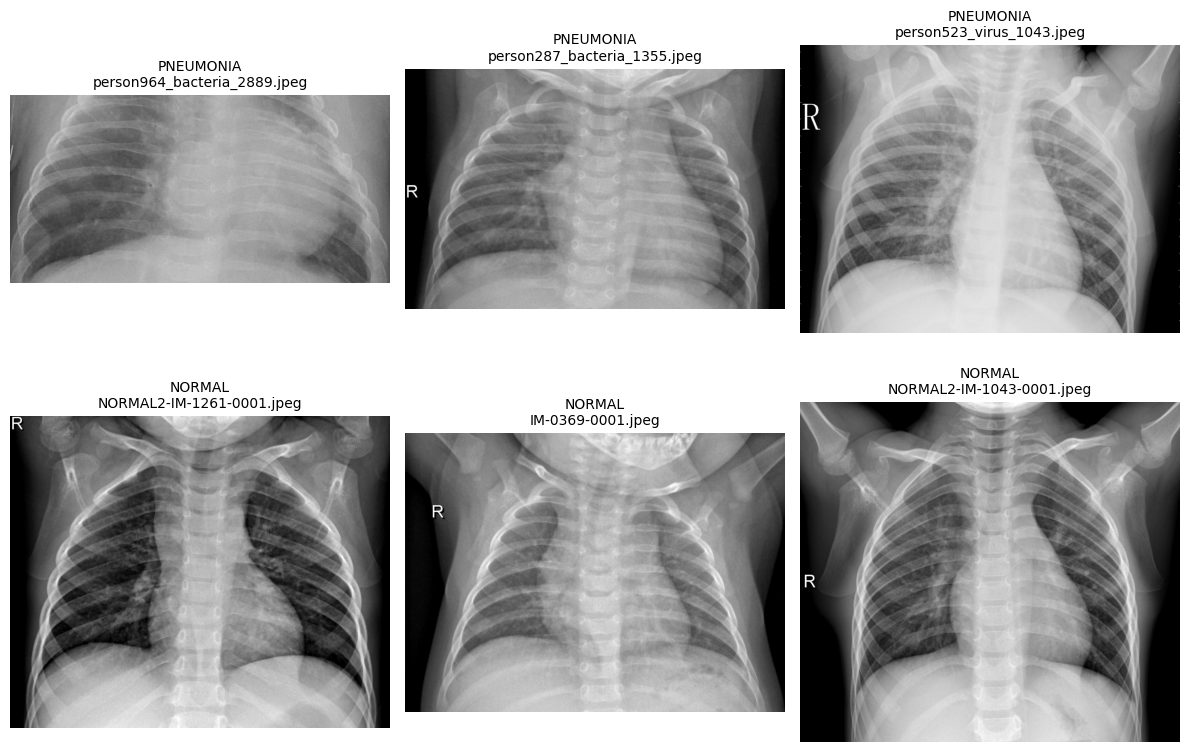

Test set samples:


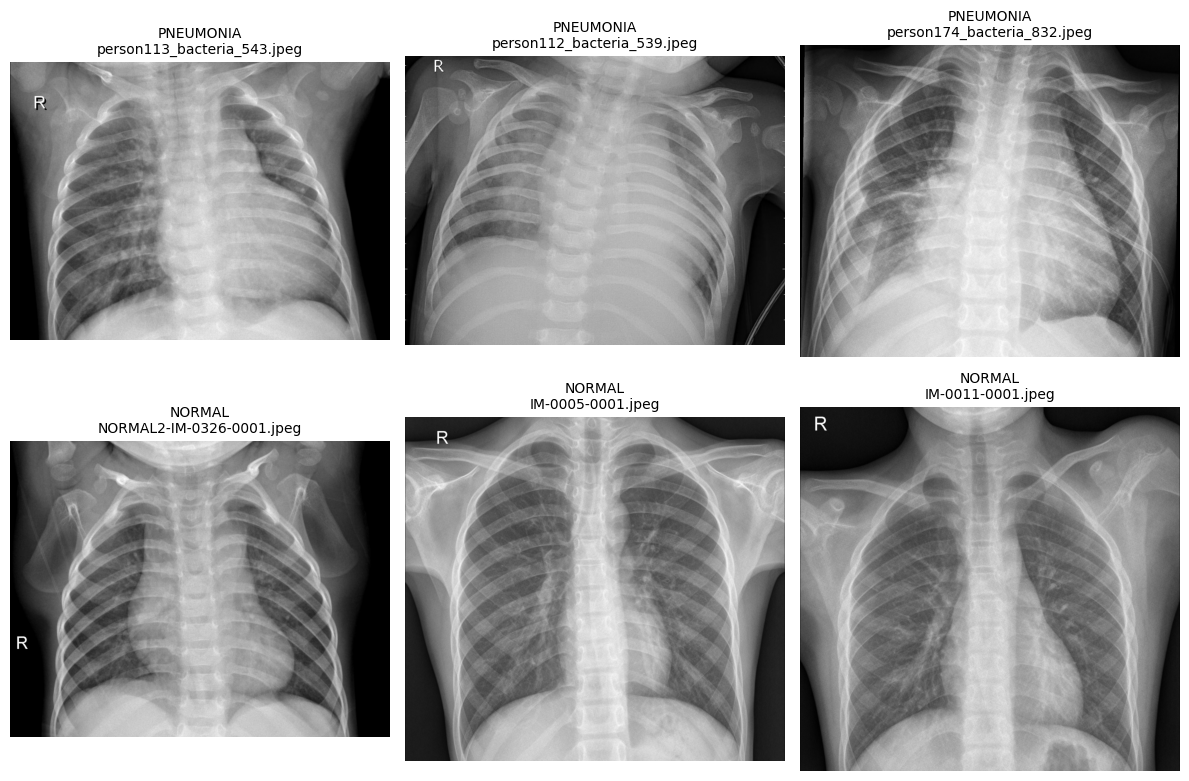

Validation set samples:


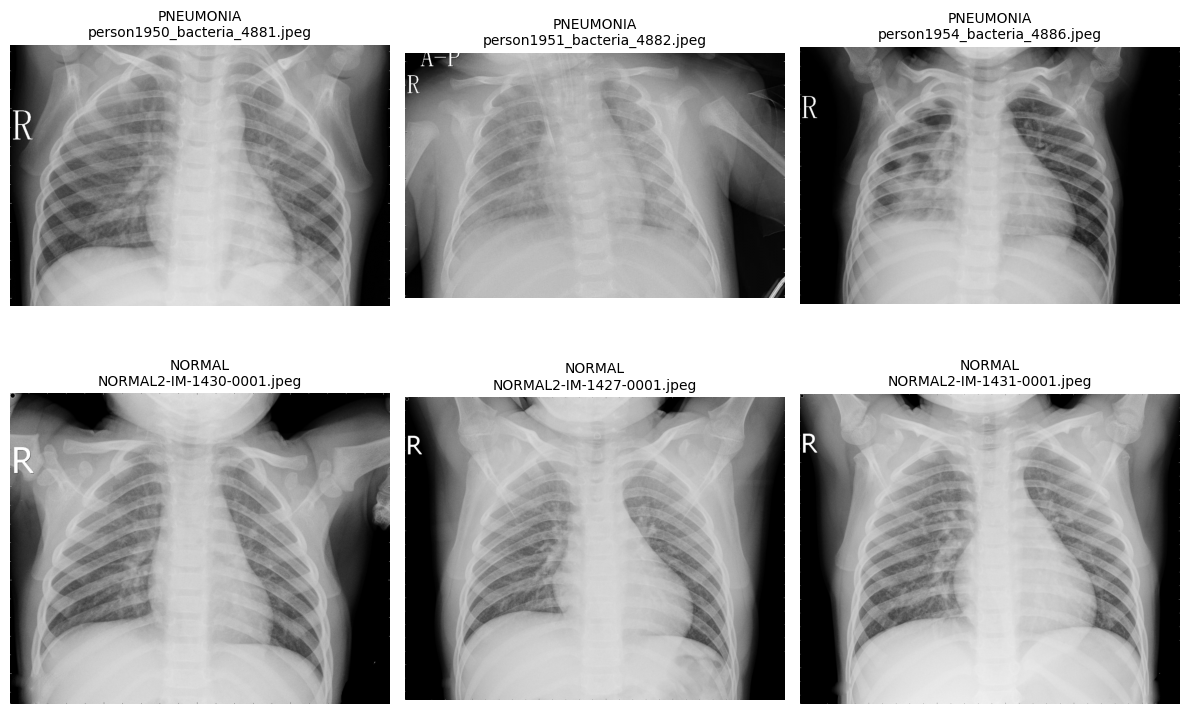

In [ ]:
import os  ## Used for interacting with the file system (like listing directories or joining paths).
import random ## Helps in selecting random images.
import matplotlib.pyplot as plt ## Used for displaying the images in a grid.
import matplotlib.image as mpimg ## Used to read image files into arrays.

def show_random_images(data_dir, n=3): ## This function displays n random images per class from the directory data_dir.

    """
    Pick n random images from each class in data_dir and display them.
    """
    classes = os.listdir(data_dir) ## Get the list of classes in the directory.This means your dataset has 2 classes:PNEUMONIA,NORMAL
    plt.figure(figsize=(n * 4, len(classes) * 4)) ## Create a figure with the specified size.

    for i, cls in enumerate(classes): ## Iterate over the classes.
    ## enumerate(classes) gives you both: i: index of the class (e.g., 0, 1, ...),cls: class name (e.g., "PNEUMONIA", "NORMAL")
    ## So, if classes = ['PNEUMONIA', 'NORMAL'], this loop runs twice:
    ## 1st iteration: i = 0, cls = 'PNEUMONIA'
    ##2nd iteration: i = 1, cls = 'NORMAL'
      cls_dir = os.path.join(data_dir, cls) ## Create the full path to the class directory,Joins the base data_dir path with the class folder name.
      ## data_dir = "train_dir"
      ## cls = "PNEUMONIA"
      ## cls_dir = "train_dir/PNEUMONIA"

      imgs = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
      ## f for f in os.listdir(cls_dir): Loop through every file f in the cls_dir folder
      ## if f.lower().endswith(('.png', '.jpg', '.jpeg')): Filter only the image files — skip any non-image files (like .txt, .csv, .DS_Store, etc.)
      ## f.lower(): Ensures case-insensitive matching (e.g., .JPG, .PNG are also included)
      ## What imgs contains: It becomes a list of image filenames only, like: ['img1.jpg', 'img2.PNG', 'scan3.jpeg']

      sample = random.sample(imgs, min(n, len(imgs)))
      ## Randomly picks n images from the list imgs
      ## min(n, len(imgs)) ensures you don’t request more images than available (to avoid errors).

      for j, img_name in enumerate(sample):
      ## Loops through the sample list (which contains randomly selected image filenames for one class).
      ## enumerate() gives:
      ## j: the index of the image in the sample (e.g., 0, 1, 2...)
      ## img_name: the name of the image file (e.g., "img1.jpg")
        img_path = os.path.join(cls_dir, img_name)
        ## Constructs the full path to the image file.
        ## cls_dir: is the folder path for the current class (e.g., "train_dir/PNEUMONIA")
        ## img_name: is the filename (e.g., "img1.jpg")
        img = mpimg.imread(img_path)
        ## Reads the image file from the path into a NumPy array using matplotlib.image.imread().
        ## img now holds the actual pixel data of the image (in grayscale or RGB format).

        ## plt.subplot() does need plt.subplot(total_rows, total_columns, index_in_flat_grid)
        ax = plt.subplot(len(classes), n, i * n + j + 1)
        ## Creating a 2×3 grid using subplot(2, 3, index).
        ## The index must go from 1 to 6 to place images in correct positions.
        ## The formula i * n + j + 1 correctly calculates this index for any row (i) and column (j)

        ax.imshow(img, cmap='gray')
        ax.set_title(f"{cls}\n{img_name}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

## Python internally reads your call like:
## show_random_images(train_dir)  ➝  show_random_images(train_dir, n=3)

print("Train set samples:")
show_random_images(train_dir)

print("Test set samples:")
show_random_images(test_dir)

print("Validation set samples:")
show_random_images(val_dir)


**Knowing the datset: The Size**

In [ ]:
import os

def count_images(data_dir):
    total = 0
    for cls in os.listdir(data_dir):
        cls_path = os.path.join(data_dir, cls)
        if os.path.isdir(cls_path):
            images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            total += len(images)
    return total

# Example usage:
train_count = count_images(train_dir)
test_count = count_images(test_dir)
val_count = count_images(val_dir)

print(f"Total images in train set: {train_count}")
print(f"Total images in test set: {test_count}")
print(f"Total images in validation set: {val_count}")


Total images in train set: 5236
Total images in test set: 624
Total images in validation set: 16


# **How Does Computer Interpret the Images**

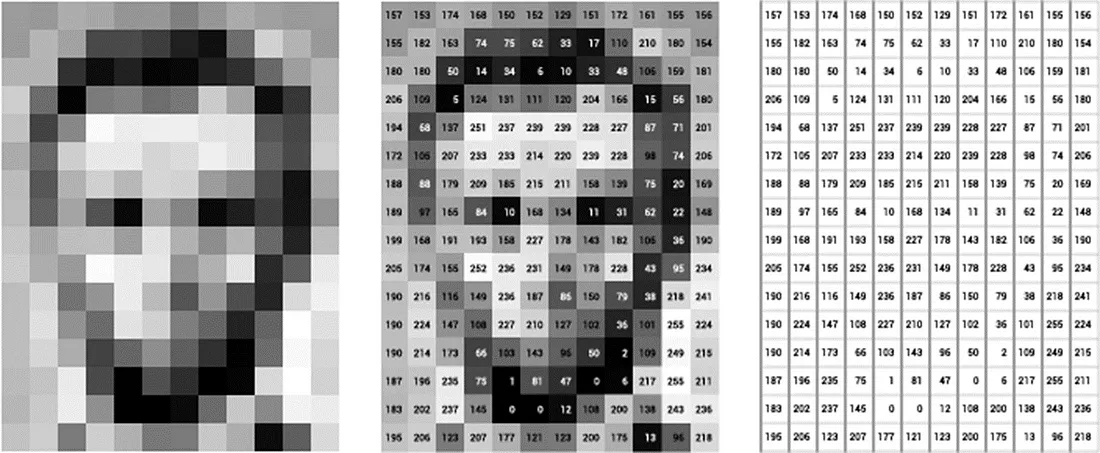

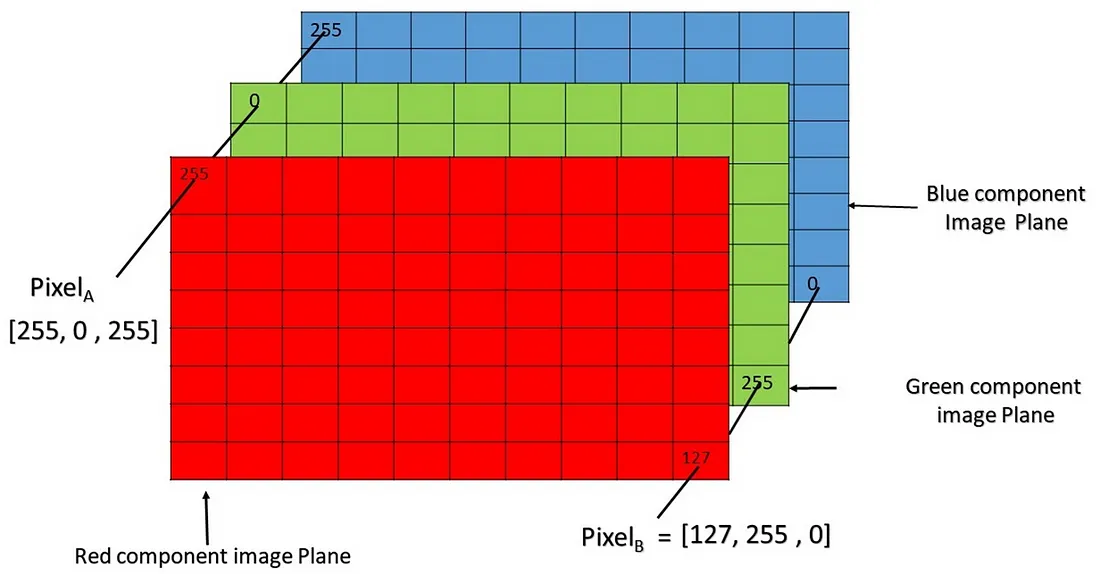

## **1. Grayscale Images (Black & White)**

*  Represented as a 2D array of shape (height, width)
*   Each element (pixel) is a single integer from 0 to 255

  *   0 = Black
  *   255 = White
  *   Values in between = shades of gray

This would be a 2×3 grayscale image.

## **2. RGB (Color) Images**
1. Represented as a 3D array of shape (height, width, 3)
2. Each pixel has 3 values → one for Red, Green, Blue
3. Each channel value ranges from 0 to 255

## **Edge Detection (Convolution Operation)**

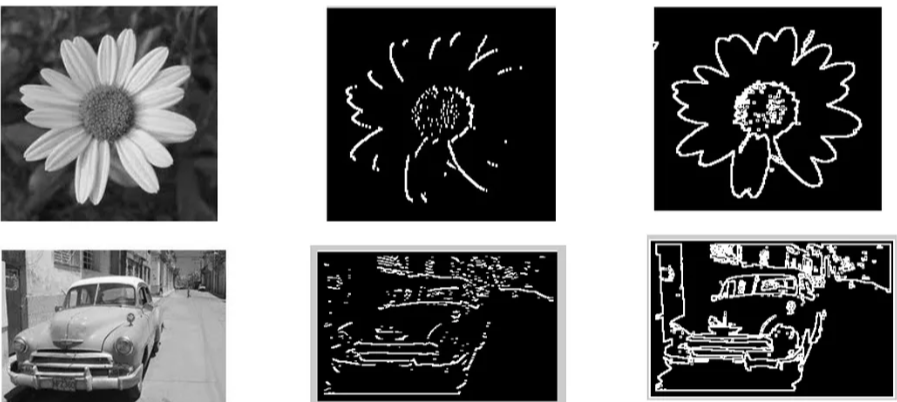

## **How does a kernel/filter helps in the edge detection and makes the 2D array of image (in in greyscale to a feature map**


<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*sCUNjAOQvXc3dr8dcSSfoA.gif" width="500">

<img src="https://cdn-images-1.medium.com/v2/resize:fit:800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif" width="500">


### For RGB Images these kernel change to a 3x3x3 filter

# ***These matrix are changed accordingly during back propagation***

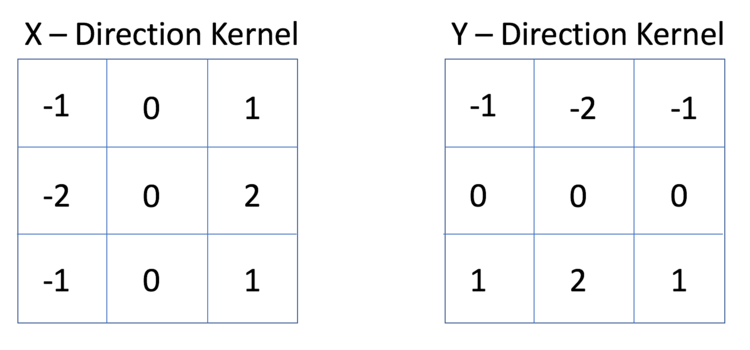

For Images we apply Multiple filters at the same time to detect different features

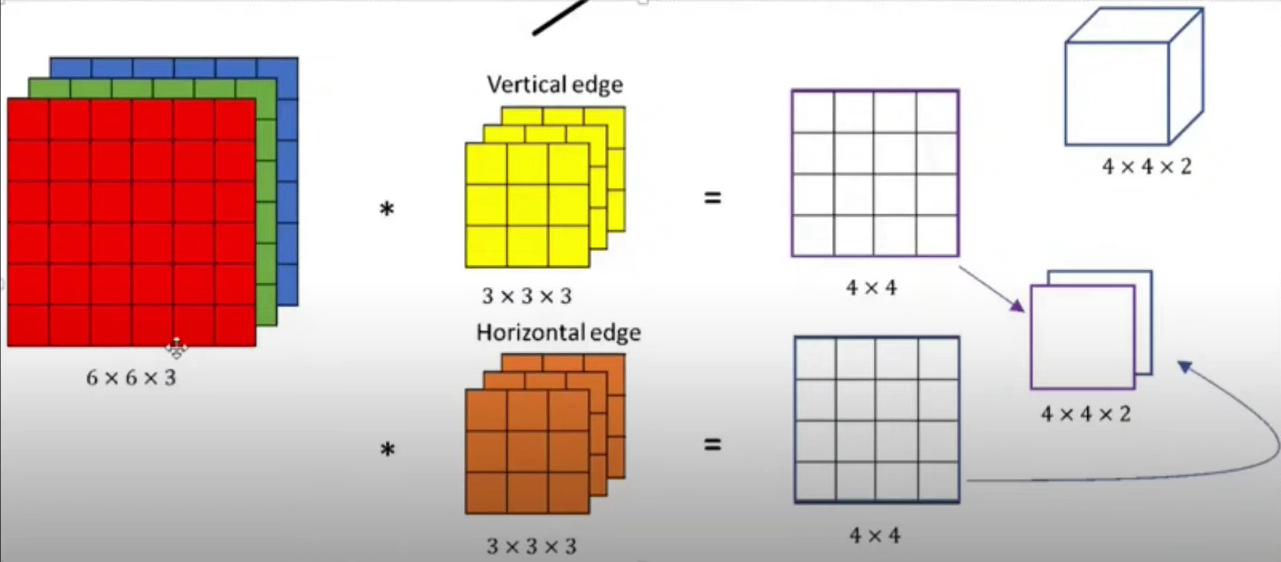

# **WHY IS PADDING ESSENTIAL**

1. Edge information:
Without padding, information at the borders gets used less (too few convolutions touch it). Padding lets edge pixels contribute equally.

2. Deeper networks:
If every conv layer shrinks the map, you’d quickly end up with a tiny tensor. Padding lets you stack many layers without collapsing spatial dimensions.

3. Architectures that rely on matching feature‑map sizes continue to work cleanly

<img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif
" width="500">

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*nDCLdHdKK32s8PohosPxwQ.gif
" width="500">

## Formula for the size of **Feature** **Map**

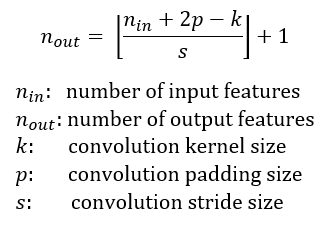

# **Key reasons we apply ReLU (Rectified Linear Unit) after Convolutional layers operation**

1. Introduce Non‑Linearity: Enables the network to approximate non‑linear decision boundaries.Without it, Conv→Conv→…Conv→Conv→… collapses to one equivalent linear operation.

2. Alleviate Vanishing Gradients: Unlike sigmoid or tanh, ReLU has a constant gradient of 1 for positive inputs, which helps gradients flow backward through many layers without shrinking to zero.

3. Computational Simplicity: ReLU is extremely cheap to compute (just a threshold at zero), which speeds up both training and inference.

4. Empirical Success: In practice, stacking conv→ReLU→conv→ReLU… has proven to be a highly effective pattern in virtually all modern CNN architectures (e.g., VGG, ResNet, EfficientNet).

In a nutshell
Convolution extracts linear feature responses (edges, textures, patterns).

**ReLU then gates those responses, killing negative “noise” and injecting the non‑linear power your network needs to solve complex vision tasks.**

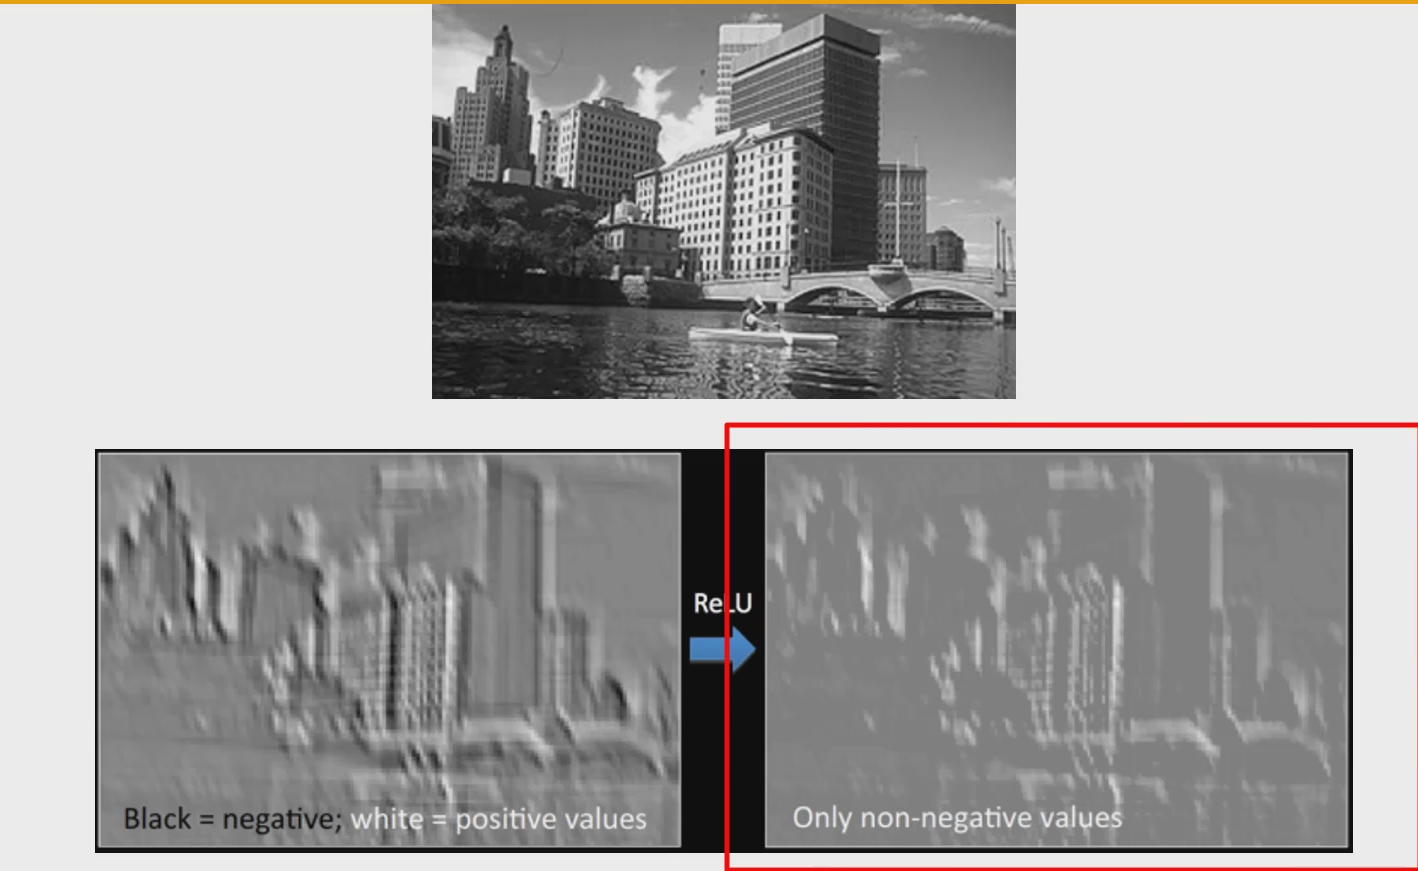

# **Why do I need strides ?**

Strides let you downsample your feature‐maps, expand receptive fields more quickly, reduce computation, and add a bit of translation invariance—all by simply telling your convolution to “hop” more than one pixel at a time.


# **Why do I need Pooling ?**



*   Pooling layers are a simple yet powerful tool to:
*   Shrink feature‑map sizes
*   Summarize activations in local neighborhoods
*   Build in robustness to small translations
*   Solves the issue of Translation variance




# **Translational Invariance**

Translation invariance (often called shift invariance) means that a model’s output—or at least its internal feature detections—doesn’t change (much) when the input is shifted by a few pixels. In other words, if you slide an object slightly to the left/right/up/down in an image, the network should still recognize it as the same object.

🛠️ How pooling helps:

Pooling layers (especially max pooling) aggregate information over small local neighborhoods. Here’s what happens:

1. Windowed aggregation:
A 2×2 max‑pooling layer with stride = 2 takes the maximum of each 2×2 block.
Whether the “strong” feature (e.g. an edge or corner) is at position (0,1) or (1,0) within that block, the pooled output is the same max value.

2. Local smoothing of position
Tiny shifts inside the pooling window (≤ window size) don’t change the pooled result.
This gives the network some tolerance to small translations: the exact location of a feature within that window no longer matters.

3. Downsampling as by‑product: By reducing spatial resolution, pooling also means later layers see a coarser map—another form of making features less sensitive to exact pixel positions.


Disadvantages of Pooling: Various Features are lost as pooling occurs

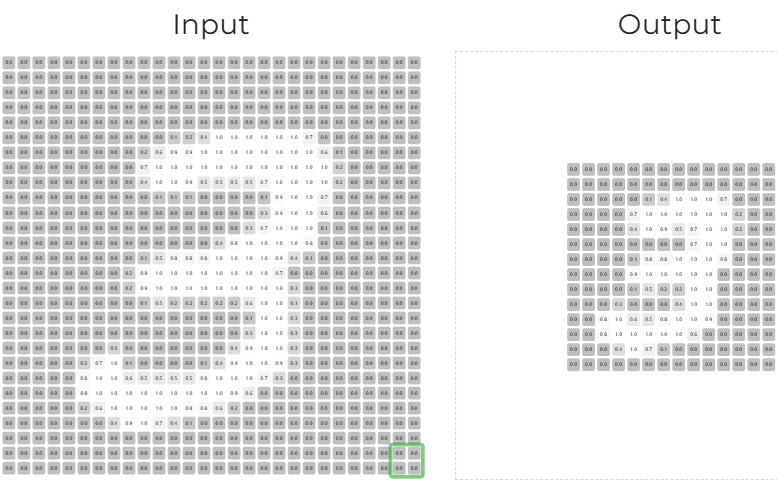

## **Flattening a pooling layer before passing it to a neural network**

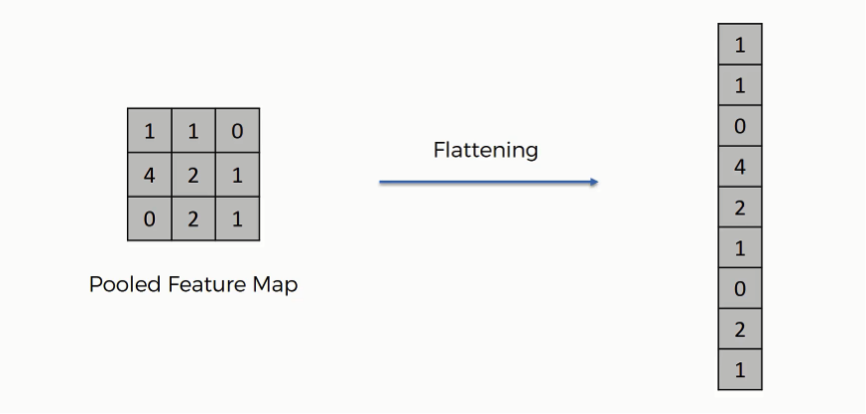

### **DATA AUGMENTATIONS IN DEEP LEARNING**

1. In order to generate Data incase it is not available in sufficient amount

2. In order to reduce over fitting

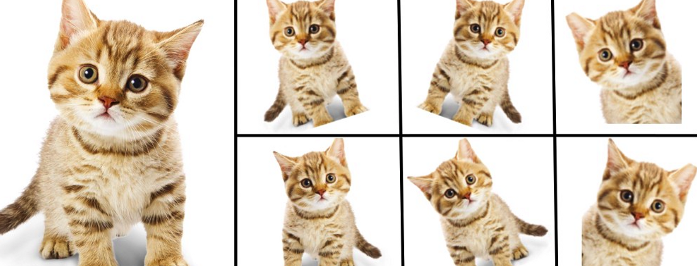

# **EDA ON THE TRAINING, TEST AND VALIDATION SET**

**VISUALIZING THE TRAINING SET**

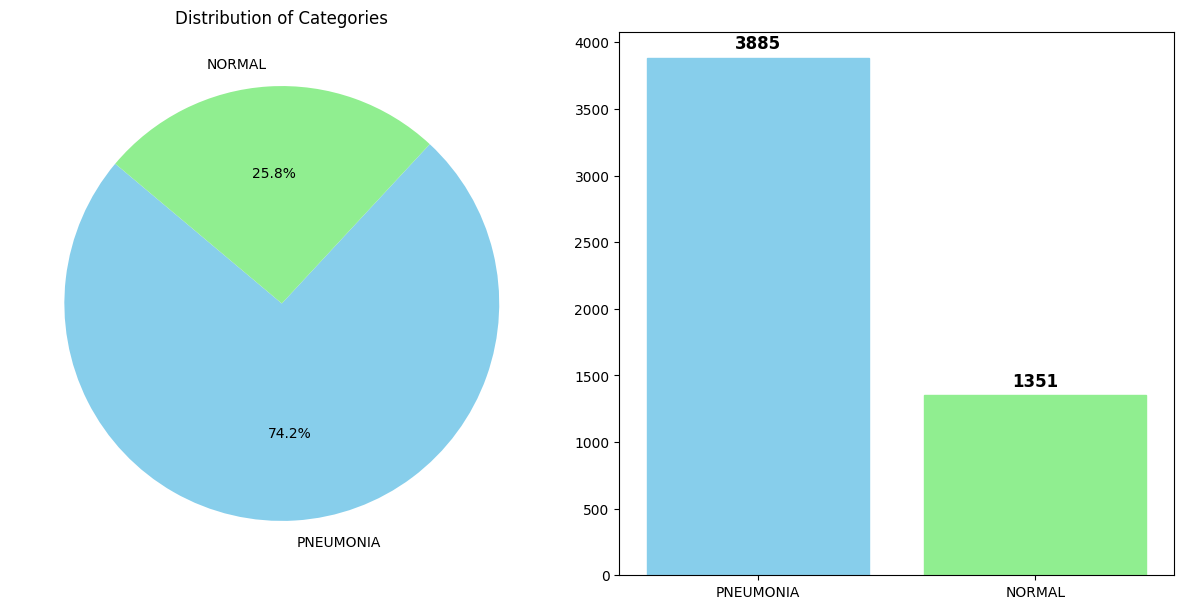

In [ ]:
import os #os: Used to interact with the file system. Here, it reads the number of images in each class folder.
import matplotlib.pyplot as plt # matplotlib.pyplot: A plotting library for creating figures like pie and bar charts.
import seaborn as sns # seaborn: A higher-level visualization library built on top of matplotlib with better styling.

# Folder path
train_dir = '/content/drive/MyDrive/xray/Xray/train'
##This is the directory containing the training images.
## It is expected to contain subfolders for each class like /train/NORMAL, /train/PNEUMONIA.

# Count number of images in each label folder
labels = os.listdir(train_dir)
##Lists all folders (class labels) in the training directory.
##For example, this might return: ['NORMAL', 'PNEUMONIA'].

count = {label: len(os.listdir(os.path.join(train_dir, label))) for label in labels}
#Dictionary comprehension that counts how many images are in each subfolder.
#os.path.join(train_dir, label) gives the full path to each class folder.
#os.listdir(...) lists the image files inside each class.


# Convert to lists for plotting
labels = list(count.keys())
values = list(count.values())
#Converts the dictionary to two separate lists:

# Define custom colors
custom_colors = ['skyblue', 'lightgreen']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
# Creates a figure with two side-by-side subplots (1 row × 2 columns).
#axs will be a list of axes: axs[0] and axs[1].
#figsize=(12, 6) sets the width and height in inches.
#facecolor='white' sets the background color of the plot.

# Pie chart
axs[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axs[0].set_title('Distribution of Categories')
#Creates a figure with two side-by-side subplots (1 row × 2 columns).
# axs will be a list of axes: axs[0] and axs[1].
# figsize=(12, 6) sets the width and height in inches.
# facecolor='white' sets the background color of the plot.
# Bar chart without palette (just x/y data)

sns.barplot(x=labels, y=values, ax=axs[1], hue=labels, legend=False)
#Draws a bar chart on the right subplot (axs[1]) using Seaborn:
#x=labels, y=values: defines bar positions and heights
#hue=labels: this groups bars by label (used here to allow color setting)
#legend=False: disables the legend since the labels are already clear
# Manually set colors of bars to match pie chart

for bar, color in zip(axs[1].patches, custom_colors):
    bar.set_color(color)
# Seaborn doesn't apply color perfectly with hue this way, so you manually color each bar:
# axs[1].patches: list of bar objects (rectangles)
# zip(...) pairs each bar with a color
# bar.set_color(color): applies the desired color
# axs[1].set_title('Count of Categories')

# Add value labels on top of each bar
for i, v in enumerate(values):
    axs[1].text(i, v + max(values) * 0.01, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')
#enumerate(values) gives index and value of each class count
# i: x-position of the bar
# v + max(values) * 0.01: y-position just above the bar
#str(v): converts value to string to display
# ha='center', va='bottom': centers the text horizontally and aligns vertically
#fontsize, fontweight: makes it readable and bold

plt.tight_layout()
plt.show()
#tight_layout(): automatically adjusts spacing to prevent overlap.
# show(): displays the full figure.



**VISUALIZING THE TEST SET**

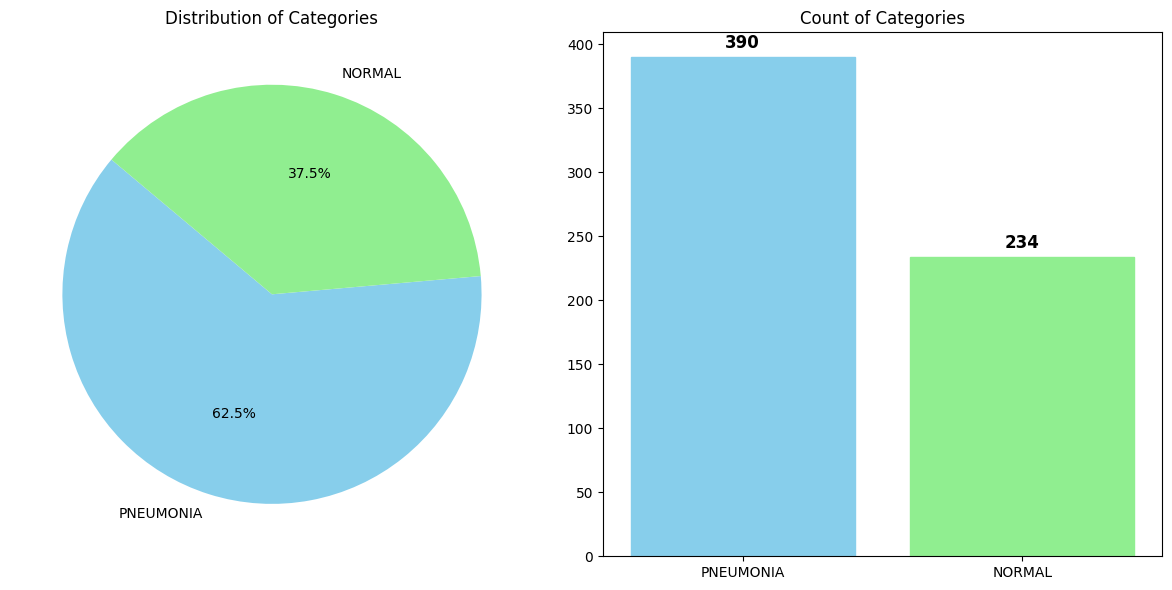

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

labels = os.listdir(test_dir)
count = {label: len(os.listdir(os.path.join(test_dir, label))) for label in labels}


labels = list(count.keys())
values = list(count.values())


custom_colors = ['skyblue', 'lightgreen']


fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')


axs[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axs[0].set_title('Distribution of Categories')


sns.barplot(x=labels, y=values, ax=axs[1], hue=labels, legend=False)


for bar, color in zip(axs[1].patches, custom_colors):
    bar.set_color(color)

axs[1].set_title('Count of Categories')


for i, v in enumerate(values):
    axs[1].text(i, v + max(values) * 0.01, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**VISUALIZING THE VALIDATION SET**

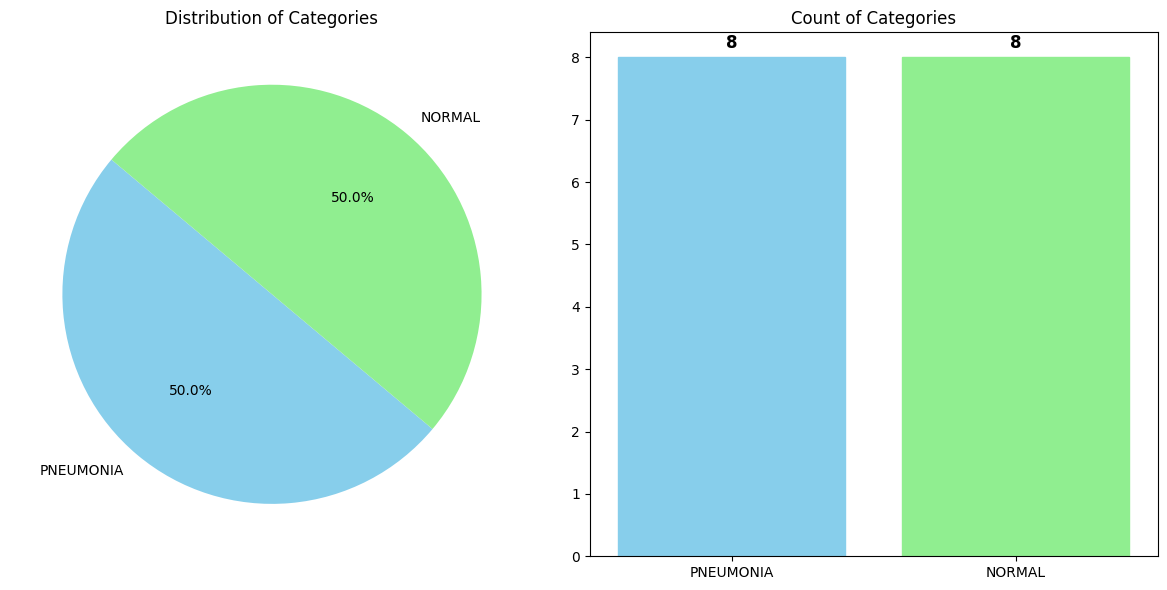

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

labels = os.listdir(val_dir)
count = {label: len(os.listdir(os.path.join(val_dir, label))) for label in labels}


labels = list(count.keys())
values = list(count.values())


custom_colors = ['skyblue', 'lightgreen']


fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')


axs[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axs[0].set_title('Distribution of Categories')


sns.barplot(x=labels, y=values, ax=axs[1], hue=labels, legend=False)


for bar, color in zip(axs[1].patches, custom_colors):
    bar.set_color(color)

axs[1].set_title('Count of Categories')


for i, v in enumerate(values):
    axs[1].text(i, v + max(values) * 0.01, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# **Yann's LENET-5 Architecture**

LeCun and colleagues designed LeNet‑5 to classify the MNIST digits, which has 10 labels (0 through 9), so they made the final fully‑connected layer have 10 neurons. Each neuron corresponds to one digit class, and after applying softmax you get a probability for each digit. At inference you pick the neuron with the highest probability as the network’s prediction.

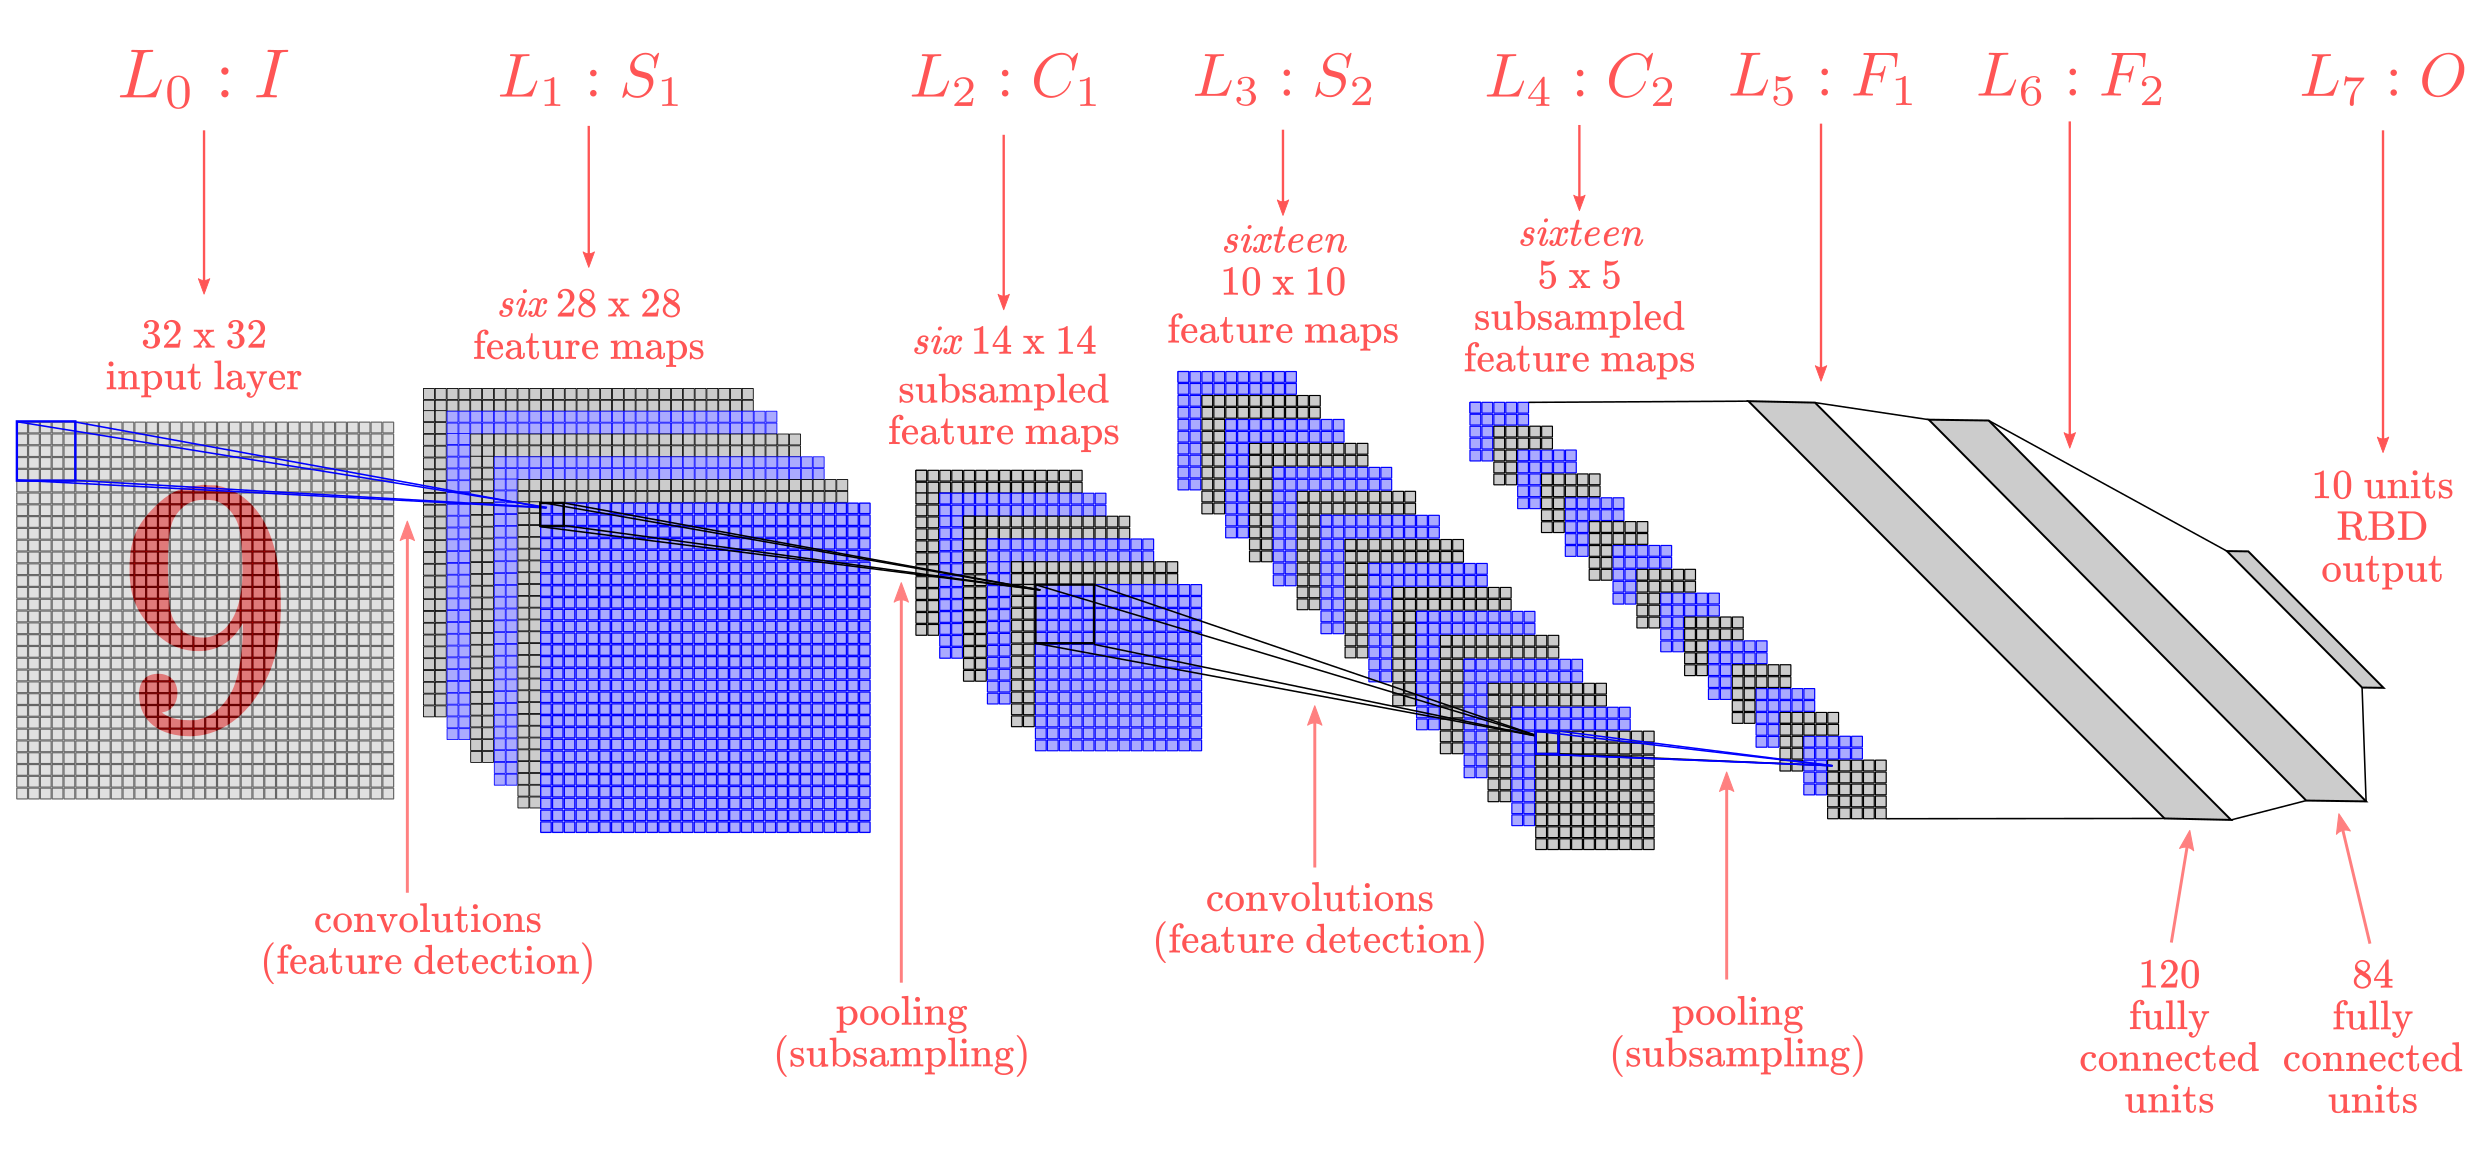

## **The last layer was optimized by a softmax function.**

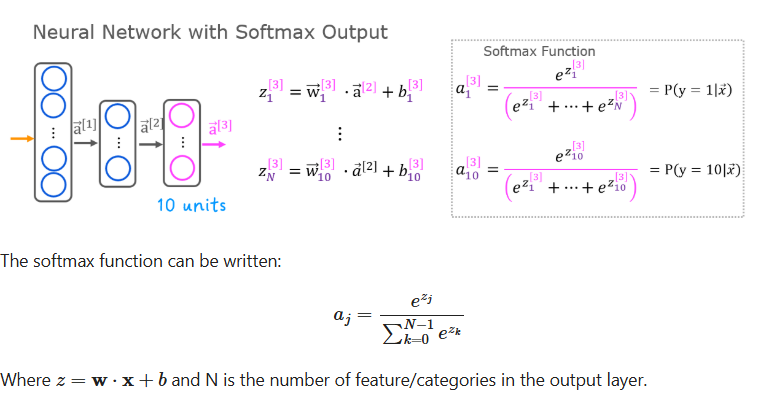

ONE OF THE KEY INSIGHTS FOR THE LENET-5 ARCHITECTURE IS THAT IT DOESN'T USE THE RECENT 'RELU' FUNCTION AFTER CONVOLUTIONS IT HAS ALWAYS USED THE TANH FUNCTION

In [ ]:
import tensorflow as tf

IMAGE_SIZE = (32, 32)
BATCH_SIZE = 32
SEED = 123


In [ ]:
from tensorflow.keras import layers, models, Input

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary',
    color_mode='rgb'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary',
    color_mode='rgb'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=1,
    label_mode='binary',
    color_mode='rgb'
)

Found 5236 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:

def preprocess(image, label):

    image = tf.image.rgb_to_grayscale(image)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32, 1)))
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', padding='same'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,061 (320.55 KB)

 Trainable params: 82,061 (320.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 657s 4s/step - accuracy: 0.8042 - loss: 0.4009 - val_accuracy: 0.8750 - val_loss: 0.3106
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 66s 400ms/step - accuracy: 0.9393 - loss: 0.1511 - val_accuracy: 0.8125 - val_loss: 0.3806
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 78s 378ms/step - accuracy: 0.9513 - loss: 0.1307 - val_accuracy: 0.8750 - val_loss: 0.2907
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 371ms/step - accuracy: 0.9534 - loss: 0.1209 - val_accuracy: 0.8750 - val_loss: 0.2900
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 374ms/step - accuracy: 0.9574 - loss: 0.1196 - val_accuracy: 0.8125 - val_loss: 0.2880
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 61s 369ms/step - accuracy: 0.9575 - loss: 0.1091 - val_accuracy: 0.8125 - val_loss: 0.3689
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 85s 384ms/step - accuracy: 0.9604 - loss: 0.1022 - val_accuracy: 0.8750 - val_loss: 0.2762
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 66s 405ms/step - accuracy: 0.9615 - loss: 0.1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

def get_labels_and_predictions(dataset, model):
    """Extracts labels and predictions from a TensorFlow dataset"""
    y_true = []
    y_pred = []
    y_pred_prob = []
    for images, labels in dataset:
        preds_prob = model.predict(images, verbose=0)
        preds = (preds_prob > 0.5).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.flatten())
        y_pred_prob.extend(preds_prob.flatten())
    return np.array(y_true), np.array(y_pred), np.array(y_pred_prob)

# Get predictions for all datasets
train_true, train_pred, train_prob = get_labels_and_predictions(train_ds, model)
test_true, test_pred, test_prob = get_labels_and_predictions(test_ds, model)

# Calculate metrics
metrics = {
    'train': {
        'accuracy': accuracy_score(train_true, train_pred),
        'precision': precision_score(train_true, train_pred),
        'recall': recall_score(train_true, train_pred),
        'f1': f1_score(train_true, train_pred),
        'fpr': roc_curve(train_true, train_prob)[0],
        'tpr': roc_curve(train_true, train_prob)[1],
        'roc_auc': auc(*roc_curve(train_true, train_prob)[:2])
    },
    'test': {
        'accuracy': accuracy_score(test_true, test_pred),
        'precision': precision_score(test_true, test_pred),
        'recall': recall_score(test_true, test_pred),
        'f1': f1_score(test_true, test_pred),
        'fpr': roc_curve(test_true, test_prob)[0],
        'tpr': roc_curve(test_true, test_prob)[1],
        'roc_auc': auc(*roc_curve(test_true, test_prob)[:2])
    }
}

# Print key metrics
print(f"Train Accuracy: {metrics['train']['accuracy']:.4f}")
print(f"Test Accuracy: {metrics['test']['accuracy']:.4f}")
print(f"\nClassification Report (Test Set):")
print(f"Precision: {metrics['test']['precision']:.4f}")
print(f"Recall: {metrics['test']['recall']:.4f}")
print(f"F1 Score: {metrics['test']['f1']:.4f}")
print(f"ROC AUC: {metrics['test']['roc_auc']:.4f}")


Train Accuracy: 0.6243
Test Accuracy: 0.5144

Classification Report (Test Set):
Precision: 0.5901
Recall: 0.7308
F1 Score: 0.6529
ROC AUC: 0.3786


# **FORMING A CONVOLUTIONAL NEURAL NETWORK!**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 128
SEED = 42

def load_dataset(path, shuffle=False):
    return tf.keras.utils.image_dataset_from_directory(
        directory=path,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        shuffle=shuffle,
        seed=SEED
    )

train_ds = load_dataset(train_dir, shuffle=True)
val_ds = load_dataset(val_dir)
test_ds = load_dataset(test_dir)

rescale = layers.Rescaling(1./255)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom((-0.2, 0.2)),
    layers.RandomTranslation(0.1, 0.1)
])

cnn = Sequential([
    layers.Input(shape=(224, 224, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

cnn.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=[tf.keras.metrics.AUC()])

cnn.fit(
    train_ds,
    epochs=200,
    validation_data=val_ds,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
    verbose=2
)


Found 5236 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Epoch 1/200
41/41 - 86s - 2s/step - auc_1: 0.6954 - loss: 0.5130 - val_auc_1: 0.8438 - val_loss: 0.7391
Epoch 2/200
41/41 - 98s - 2s/step - auc_1: 0.8999 - loss: 0.3375 - val_auc_1: 0.9375 - val_loss: 0.4173
Epoch 3/200
41/41 - 42s - 1s/step - auc_1: 0.9510 - loss: 0.2435 - val_auc_1: 0.9219 - val_loss: 0.4185
Epoch 4/200
41/41 - 81s - 2s/step - auc_1: 0.9557 - loss: 0.2337 - val_auc_1: 0.9375 - val_loss: 0.4588
Epoch 5/200
41/41 - 41s - 995ms/step - auc_1: 0.9590 - loss: 0.2239 - val_auc_1: 0.9219 - val_loss: 0.5874
Epoch 6/200
41/41 - 41s - 1s/step - auc_1: 0.9595 - loss: 0.2235 - val_auc_1: 0.9219 - val_loss: 0.4585
Epoch 7/200
41/41 - 83s - 2s/step - auc_1: 0.9715 - loss: 0.1853 - val_auc_1: 0.9062 - val_loss: 0.5167


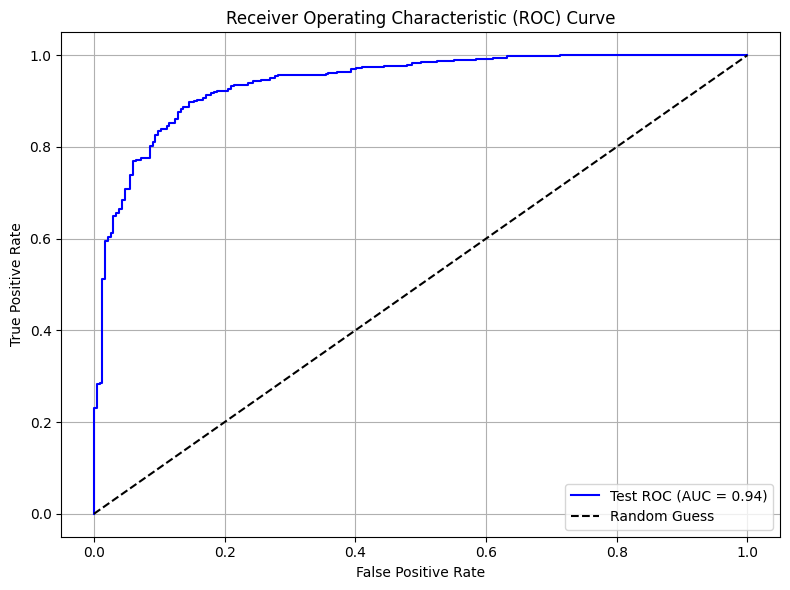

Train Accuracy: 0.9544
Test Accuracy: 0.7965

Classification Report (Test Set):
Precision: 0.7604
Recall: 0.9846
F1 Score: 0.8581
ROC AUC: 0.9407


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def get_labels_and_predictions(dataset, model):
    y_true = []
    y_pred = []
    y_pred_prob = []
    for images, labels in dataset:
        preds_prob = model.predict(images, verbose=0)
        preds = (preds_prob > 0.5).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.flatten())
        y_pred_prob.extend(preds_prob.flatten())
    return np.array(y_true), np.array(y_pred), np.array(y_pred_prob)


train_true, train_pred, train_prob = get_labels_and_predictions(train_ds, cnn)
test_true, test_pred, test_prob = get_labels_and_predictions(test_ds, cnn)

fpr_test, tpr_test, _ = roc_curve(test_true, test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

metrics = {
    'train': {
        'accuracy': accuracy_score(train_true, train_pred),
        'precision': precision_score(train_true, train_pred),
        'recall': recall_score(train_true, train_pred),
        'f1': f1_score(train_true, train_pred),
    },
    'test': {
        'accuracy': accuracy_score(test_true, test_pred),
        'precision': precision_score(test_true, test_pred),
        'recall': recall_score(test_true, test_pred),
        'f1': f1_score(test_true, test_pred),
        'roc_auc': roc_auc_test
    }
}

print(f"Train Accuracy: {metrics['train']['accuracy']:.4f}")
print(f"Test Accuracy: {metrics['test']['accuracy']:.4f}")
print(f"\nClassification Report (Test Set):")
print(f"Precision: {metrics['test']['precision']:.4f}")
print(f"Recall: {metrics['test']['recall']:.4f}")
print(f"F1 Score: {metrics['test']['f1']:.4f}")
print(f"ROC AUC: {metrics['test']['roc_auc']:.4f}")


## **VGGNET 2019 MODEL**

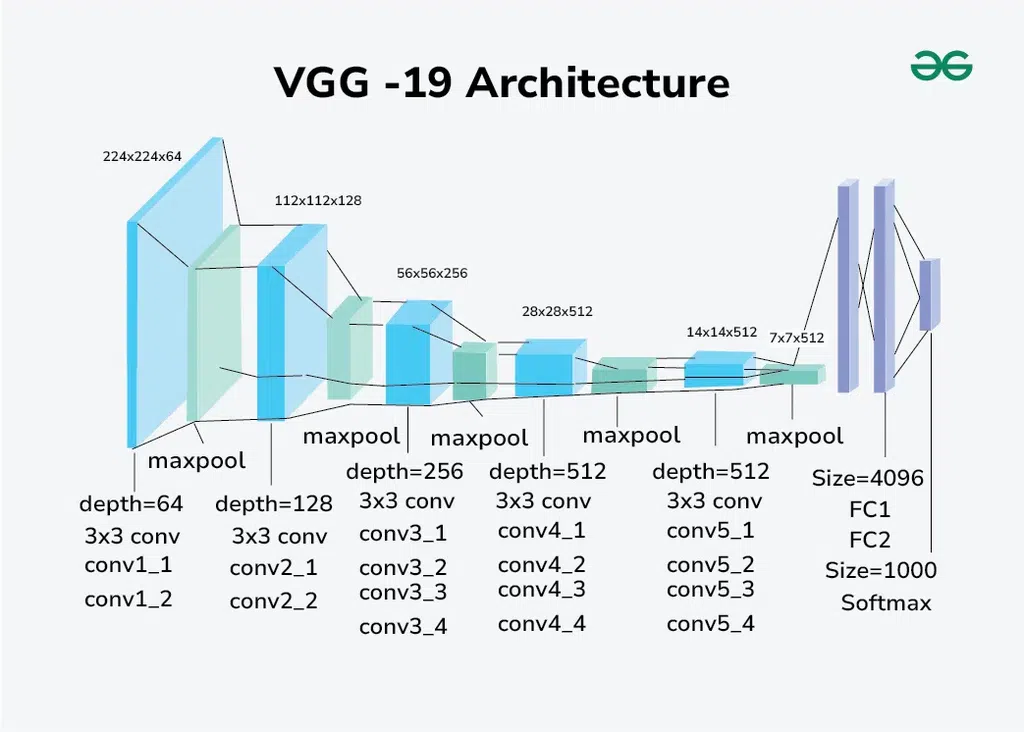

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 128
SEED = 42


def load_dataset(path, shuffle=False):
    return tf.keras.utils.image_dataset_from_directory(
        directory=path,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        shuffle=shuffle,
        seed=SEED
    )

train_ds = load_dataset(train_dir, shuffle=True)
val_ds = load_dataset(val_dir)
test_ds = load_dataset(test_dir)


AUTOTUNE = tf.data.AUTOTUNE


data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

rescale = layers.Rescaling(1./255)


def prepare_dataset(ds, training=False):
    ds = ds.map(lambda x, y: (rescale(x), y), num_parallel_calls=AUTOTUNE)
    if training:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    return ds.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare_dataset(train_ds, training=True)
val_ds = prepare_dataset(val_ds)
test_ds = prepare_dataset(test_ds)


base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1
)


Found 5236 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 651s 13s/step - auc: 0.5756 - loss: 0.6132 - val_auc: 0.8906 - val_loss: 0.7454
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - auc: 0.9176 - loss: 0.4885 - val_auc: 0.8984 - val_loss: 0.6634
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - auc: 0.9333 - loss: 0.3908 - val_auc: 0.9062 - val_loss: 0.6841
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - auc: 0.9329 - loss: 0.3222 - val_auc: 0.9062 - val_loss: 0.6740
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - auc: 0.9368 - loss: 0.2983 - val_auc: 0.9062 - val_loss: 0.6340
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - auc: 0.9410 - loss: 0.2782 - val_auc: 0.9062 - val_loss: 0.5639
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - auc: 0.9483 - loss: 0.2588 - val_auc: 0.9062 - val_loss: 0.6160
Epoch 8/20
41/

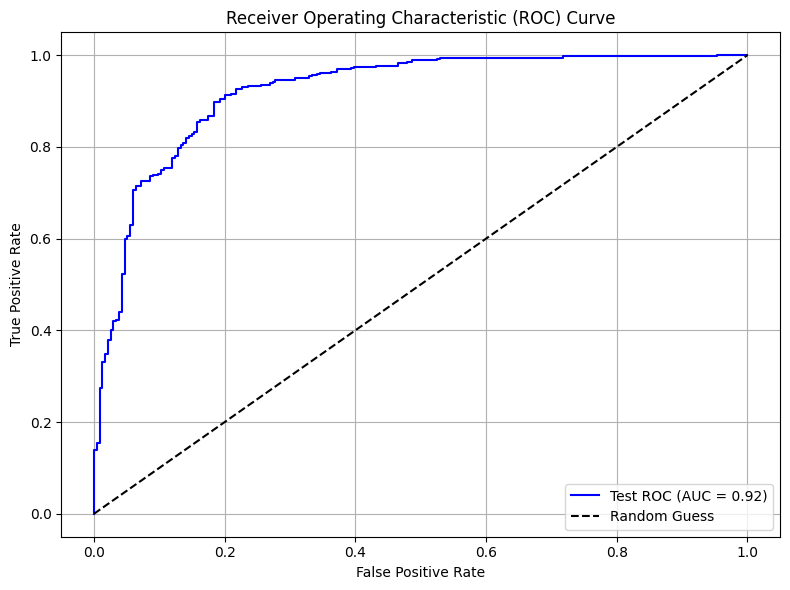

Train Accuracy: 0.9385
Test Accuracy: 0.8349

Classification Report (Test Set):
Precision: 0.8047
Recall: 0.9718
F1 Score: 0.8804
ROC AUC: 0.9212


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def get_labels_and_predictions(dataset, model):
    y_true = []
    y_pred = []
    y_pred_prob = []
    for images, labels in dataset:
        preds_prob = model.predict(images, verbose=0)
        preds = (preds_prob > 0.5).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.flatten())
        y_pred_prob.extend(preds_prob.flatten())
    return np.array(y_true), np.array(y_pred), np.array(y_pred_prob)


train_true, train_pred, train_prob = get_labels_and_predictions(train_ds,model)
test_true, test_pred, test_prob = get_labels_and_predictions(test_ds,model)

fpr_test, tpr_test, _ = roc_curve(test_true, test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

metrics = {
    'train': {
        'accuracy': accuracy_score(train_true, train_pred),
        'precision': precision_score(train_true, train_pred),
        'recall': recall_score(train_true, train_pred),
        'f1': f1_score(train_true, train_pred),
    },
    'test': {
        'accuracy': accuracy_score(test_true, test_pred),
        'precision': precision_score(test_true, test_pred),
        'recall': recall_score(test_true, test_pred),
        'f1': f1_score(test_true, test_pred),
        'roc_auc': roc_auc_test
    }
}

print(f"Train Accuracy: {metrics['train']['accuracy']:.4f}")
print(f"Test Accuracy: {metrics['test']['accuracy']:.4f}")
print(f"\nClassification Report (Test Set):")
print(f"Precision: {metrics['test']['precision']:.4f}")
print(f"Recall: {metrics['test']['recall']:.4f}")
print(f"F1 Score: {metrics['test']['f1']:.4f}")
print(f"ROC AUC: {metrics['test']['roc_auc']:.4f}")


#**USING THE BASE MODEL AS RESNET50**

ResNet (short for Residual Network) is a deep convolutional neural network architecture introduced by Kaiming He et al. in the 2015 paper:

"Deep Residual Learning for Image Recognition"
It won the ImageNet Challenge 2015 with a top-5 error rate of only 3.57%, beating human-level performance.

🔹 ResNet-50 structure:
* 50 layers deep
* Residual (skip) connections throughout
* Convolutions with BatchNorm and ReLU
* Uses bottleneck blocks (3-layer blocks)









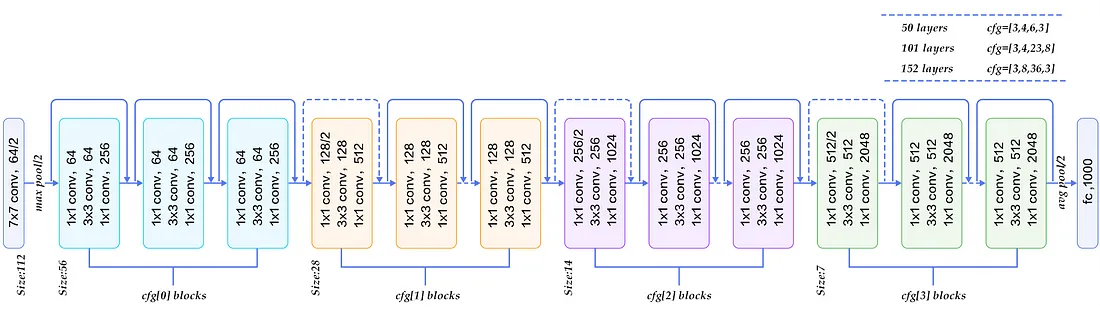

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 128
SEED = 42


def load_dataset(path, shuffle=False):
    return tf.keras.utils.image_dataset_from_directory(
        directory=path,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        shuffle=shuffle,
        seed=SEED
    )

train_ds = load_dataset(train_dir, shuffle=True)
val_ds = load_dataset(val_dir)
test_ds = load_dataset(test_dir)


AUTOTUNE = tf.data.AUTOTUNE


data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

rescale = layers.Rescaling(1./255)

def prepare_dataset(ds, training=False):
    ds = ds.map(lambda x, y: (rescale(x), y), num_parallel_calls=AUTOTUNE)
    if training:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    return ds.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare_dataset(train_ds, training=True)
val_ds = prepare_dataset(val_ds)
test_ds = prepare_dataset(test_ds)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1
)


Found 5236 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - auc: 0.5252 - loss: 0.5661 - val_auc: 0.8047 - val_loss: 0.8500
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - auc: 0.6524 - loss: 0.5640 - val_auc: 0.8047 - val_loss: 0.8152
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - auc: 0.7436 - loss: 0.5497 - val_auc: 0.8438 - val_loss: 0.8599
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - auc: 0.7440 - loss: 0.5349 - val_auc: 0.8281 - val_loss: 0.8473
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - auc: 0.7977 - loss: 0.5303 - val_auc: 0.8359 - val_loss: 0.8560
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - auc: 0.8110 - loss: 0.5060 - val_auc: 0.8438 - val_loss: 0.7719
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - auc: 0.8330 - loss: 0.4783 - val_auc: 0.8438 - val_loss: 0.6773
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - auc: 0.8270 

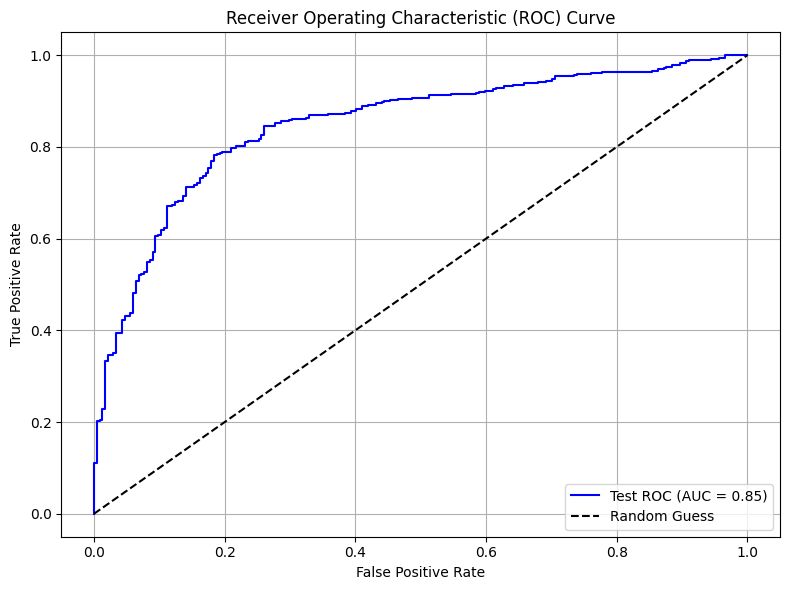

Train Accuracy: 0.8186
Test Accuracy: 0.7708

Classification Report (Test Set):
Precision: 0.7751
Recall: 0.8923
F1 Score: 0.8296
ROC AUC: 0.8487


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def get_labels_and_predictions(dataset, model):
    y_true = []
    y_pred = []
    y_pred_prob = []
    for images, labels in dataset:
        preds_prob = model.predict(images, verbose=0)
        preds = (preds_prob > 0.5).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.flatten())
        y_pred_prob.extend(preds_prob.flatten())
    return np.array(y_true), np.array(y_pred), np.array(y_pred_prob)


train_true, train_pred, train_prob = get_labels_and_predictions(train_ds,model)
test_true, test_pred, test_prob = get_labels_and_predictions(test_ds,model)

fpr_test, tpr_test, _ = roc_curve(test_true, test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

metrics = {
    'train': {
        'accuracy': accuracy_score(train_true, train_pred),
        'precision': precision_score(train_true, train_pred),
        'recall': recall_score(train_true, train_pred),
        'f1': f1_score(train_true, train_pred),
    },
    'test': {
        'accuracy': accuracy_score(test_true, test_pred),
        'precision': precision_score(test_true, test_pred),
        'recall': recall_score(test_true, test_pred),
        'f1': f1_score(test_true, test_pred),
        'roc_auc': roc_auc_test
    }
}

print(f"Train Accuracy: {metrics['train']['accuracy']:.4f}")
print(f"Test Accuracy: {metrics['test']['accuracy']:.4f}")
print(f"\nClassification Report (Test Set):")
print(f"Precision: {metrics['test']['precision']:.4f}")
print(f"Recall: {metrics['test']['recall']:.4f}")
print(f"F1 Score: {metrics['test']['f1']:.4f}")
print(f"ROC AUC: {metrics['test']['roc_auc']:.4f}")
